In [192]:
import pandas as pd
import numpy as np

url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"

# Load the SAheart dataset
df = pd.read_csv(url, index_col='row.names')

# Convert binary text data to numbered categories
df['famhist'] = pd.Categorical(df['famhist']).codes

# Extract the name of the attributes (columns)
attributeNames = list(map(lambda x: x.capitalize(), df.columns.tolist()))

# Convert the dataframe to numpy
y = df['chd'].to_numpy() # classification problem of CHD or no CHD
X = df.drop(columns=['chd']).to_numpy() # rest of the attributes

# Compute size of X
N, M = X.shape # N = observations, M = attributes (except 'chd')
N_numbers = np.arange(1, N+1)

# Normalize the datapoints to have a mean of 0 
mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X - mu) / sigma


Regularization constant: 1e-08
Crossvalidation fold: 1/10
Crossvalidation fold: 2/10
Crossvalidation fold: 3/10
Crossvalidation fold: 4/10
Crossvalidation fold: 5/10
Crossvalidation fold: 6/10
Crossvalidation fold: 7/10
Crossvalidation fold: 8/10
Crossvalidation fold: 9/10
Crossvalidation fold: 10/10
Regularization constant: 1.5998587196060573e-08
Crossvalidation fold: 1/10
Crossvalidation fold: 2/10
Crossvalidation fold: 3/10
Crossvalidation fold: 4/10
Crossvalidation fold: 5/10
Crossvalidation fold: 6/10
Crossvalidation fold: 7/10
Crossvalidation fold: 8/10
Crossvalidation fold: 9/10
Crossvalidation fold: 10/10
Regularization constant: 2.5595479226995333e-08
Crossvalidation fold: 1/10
Crossvalidation fold: 2/10
Crossvalidation fold: 3/10
Crossvalidation fold: 4/10
Crossvalidation fold: 5/10
Crossvalidation fold: 6/10
Crossvalidation fold: 7/10
Crossvalidation fold: 8/10
Crossvalidation fold: 9/10
Crossvalidation fold: 10/10
Regularization constant: 4.0949150623804276e-08
Crossvalidat

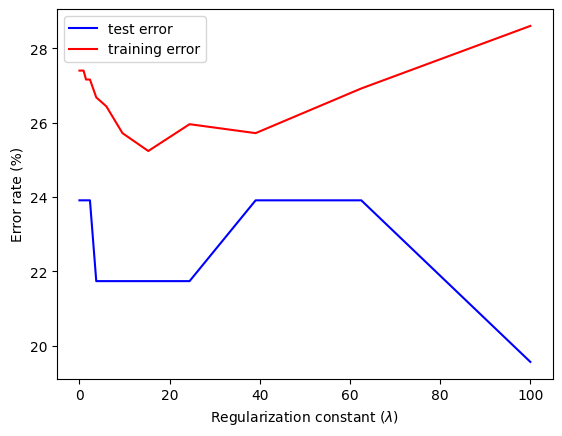

In [197]:
# Find the best regularization value for logistic regression.ipynb
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import matplotlib.pyplot as plt

lambda_reg =  np.logspace(-8, 2, 50)

# Using K-fold 10 cross validation
CV = model_selection.KFold(10)

error_logreg = np.zeros((len(lambda_reg), 2))
for l in range(len(lambda_reg)):
    print("Regularization constant: {0}".format(lambda_reg[l]))
    i = 0
    for train_index, test_index in CV.split(X, y):
        print("Crossvalidation fold: {0}/{1}".format(i + 1, 10))

        # extract training and test set for current CV fold
        X_train = X[train_index, :]
        y_train = y[train_index]
        X_test = X[test_index, :]
        y_test = y[test_index]

        # train model
        model_logreg = LogisticRegression(penalty="l2", C=1/lambda_reg[l] if lambda_reg[l] != 0 else 1e10, max_iter=500)
        model_logreg.fit(X_train, y_train)

        # predict test and training data
        y_est = model_logreg.predict(X_test)
        y_est_train = model_logreg.predict(X_train)

        error_rate_test = 100 * np.sum(y_est != y_test)/len(y_test)
        error_rate_train = 100 * np.sum(y_est_train != y_train)/len(y_train)

        error_logreg[l,0] = error_rate_test 
        error_logreg[l,1] = error_rate_train

        i += 1

# Plot the classification error rate
plt.figure()
plt.plot(lambda_reg, error_logreg[:,0], color = 'b', label = 'test error')
plt.plot(lambda_reg, error_logreg[:,1], color = 'r', label = 'training error')
plt.legend()
plt.xlabel(f'Regularization constant ($\lambda$)')
plt.ylabel("Error rate (%)")
plt.show()


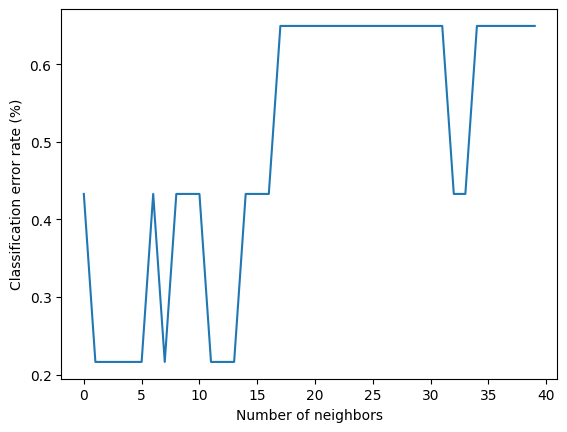

The optimal k-nearest neigbor is k = 2


In [194]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# Find the optimal number of neighbors

# Maximum number of neighbors
L = 40

CV = model_selection.KFold()
errors = np.zeros((N, L))
i = 0
for train_index, test_index in CV.split(X, y):
    # print("Crossvalidation fold: {0}/{1}".format(i + 1, N1))

    # extract training and test set for current CV fold
    X_train = X[train_index, :]
    y_train = y[train_index]
    N1_numbers_train = N_numbers[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]
    N1_numbers_test = N_numbers[test_index]
    

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    for l in range(1, L + 1):
        knclassifier = KNeighborsClassifier(n_neighbors=l)
        knclassifier.fit(X_train, y_train)
        y_est = knclassifier.predict(X_test)
        errors[i, l - 1] = np.sum(y_est[0] != y_test[0])

    i += 1

# Plot the classification error rate
plt.figure()
plt.plot(100 * sum(errors, 0) / N)
plt.xlabel("Number of neighbors")
plt.ylabel("Classification error rate (%)")
plt.show()

print('The optimal k-nearest neigbor is k = 2')


[-0.3090164  -0.50438497  0.08172072  0.08172072 -0.21133212  1.15624782
 -0.60206925  1.25393211  3.79372343  1.74235352  0.57014213  1.8400378
  0.17940501  1.54698495]


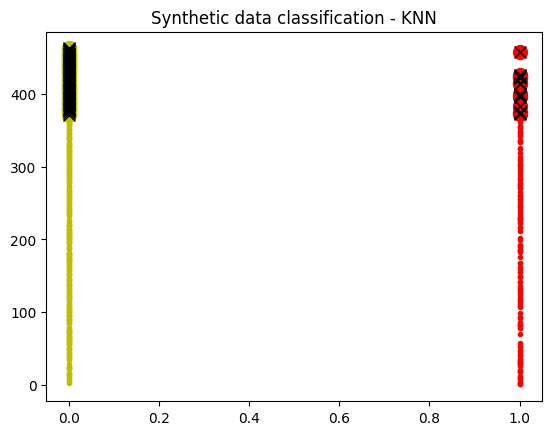

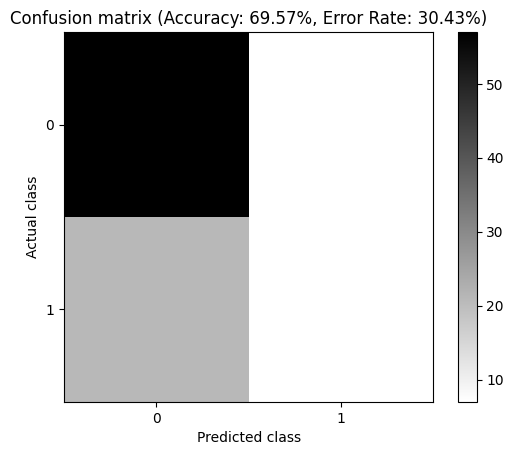

In [195]:
from sklearn.metrics import confusion_matrix

# Find KNN with k = 2
C = 2 # number of classnames: 'no CHD' and 'CHD'

# Plot the training data points (color-coded) and test data points.
plt.figure(1)
styles = [".y", ".r"]
for c in range(C):
    class_mask = y_train == c
    plt.plot(y_train[class_mask], N1_numbers_train[class_mask], styles[c])
    
# K-nearest neighbors
K = 2

# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist = 1
# metric = "minkowski"
# metric_params = {}  # no parameters needed for minkowski

# You can set the metric argument to 'cosine' to determine the cosine distance
# metric = 'cosine'
# metric_params = {} # no parameters needed for cosine

# To use a mahalonobis distance, we need to input the covariance matrix, too:
metric='mahalanobis'
metric_params={'V': np.cov(X_train, rowvar=False)}

# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(
    n_neighbors=K, p=dist, metric=metric, metric_params=metric_params
)
knclassifier.fit(X_train, y_train)
y_est = knclassifier.predict(X_test)


# Plot the classfication results
styles = ["oy", "or"] 
for c in range(C):
    class_mask = y_est == c
    plt.plot(y_est[class_mask], N1_numbers_test[class_mask], styles[c], markersize=10)
    plt.plot(y_est[class_mask], N1_numbers_test[class_mask], "kx", markersize=8)
plt.title("Synthetic data classification - KNN")
print(X_test[class_mask, 0])

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est)
accuracy = np.round(100 * cm.diagonal().sum() / cm.sum(), 2)
error_rate = np.round(100 - accuracy, 2)
plt.figure(2)
plt.imshow(cm, cmap="binary", interpolation="None")
plt.colorbar()
plt.xticks(range(C))
plt.yticks(range(C))
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title(
    "Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)".format(accuracy, error_rate)
)

plt.show()


In [196]:
# Two-layer cross validation

# K-fold for cross validation
Kfold = 10
CV = model_selection.KFold(Kfold)
error_OUT = []

k = 0
# Outer fold
for train_index_out, test_index_out in CV.split(X,y):
    print("Outer fold: {0}/{1}".format(k + 1, Kfold))
    
    # Extract the training and test set for the outer-fold
    X_train_out = X[train_index_out, :]
    y_train_out = y[train_index_out]
    X_test_out = X[test_index_out, :]
    y_test_out = y[test_index_out]

    i = 0 # Index for inner fold
    error_IN = [] # Emptry list for inner fold errors
    
    # Inner fold
    for train_index, test_index in CV.split(X_train_out, y_train_out):
        print("\quadInner fold: {0}/{1}".format(i + 1, Kfold))

        # Extract training and test set for current inner fold
        X_train = X_train_out[train_index, :]
        y_train = y_train_out[train_index]
        X_test = X_train_out[test_index, :]
        y_test = y_train_out[test_index]
        

        # Training and test of the three models
        ## K-nearest neigbors 
        k_KNN = 5
        metric='mahalanobis'
        metric_params={'V': np.cov(X_train, rowvar=False)}
        knclassifier = KNeighborsClassifier(n_neighbors=k_KNN, p = 1, metric = metric, metric_params = metric_params)
        knclassifier.fit(X_train, y_train)

        # test
        y_est_KNN = knclassifier.predict(X_test)
        Missclass_KNN = np.sum(y_est_KNN != y_test)
       
        ## Logistic Regression
        logisticclassifier = LogisticRegression(max_iter = 500)
        logisticclassifier.fit(X_train, y_train)
        
        # test
        y_est_LOGREG = logisticclassifier.predict(X_test)
        Missclass_LOGREG = np.sum(y_est_LOGREG != y_test)
        
        ## Baseline
        a = 0 # No CHD class
        b = 0 # CHD class
        while True:
            for c in range(len(y_train)):
                if y_train[c] == 0:
                    a += 1
                elif y_train[c] == 1:
                    b += 1
           
            # test
            if a > b: # If the class of no CHD (a) is largest
                y_est_base = np.full(len(y_test), 0) # baseline predicts all y's to not have CHD
                break
            else: # If the class of CHD (b) is largest
                y_est_base = np.full(len(y_test), 1) # baseline predicts all y's to have CHD
                break
        Missclass_base = np.sum(y_est_base != y_test)
        
        # Add the errors to the list
        error_IN.append([(Missclass_KNN/len(y_test)), (Missclass_LOGREG/len(y_test)), (Missclass_base/len(y_test))])
        i += 1
    
    # Find the sum of the errors of each model for the inner fold
    error_in_KNN_sum = 100 * np.sum((len(y_test)/len(y_train_out)) * np.array(error_IN)[:, 0])
    error_in_LOGREG_sum = 100 * np.sum((len(y_test)/len(y_train_out)) * np.array(error_IN)[:, 1])
    error_in_base_sum = 100 * np.sum((len(y_test)/len(y_train_out)) * np.array(error_IN)[:, 2])

    error_OUT.append([error_in_KNN_sum, error_in_LOGREG_sum, error_in_base_sum])

    k += 1



Class_df_columns = pd.MultiIndex.from_tuples([
    ("Outer fold", "i"), 
    ("KNN", "k"),
    ("KNN", "Error_test (%)"),
    ("Logistic regression", "lambda"),
    ("Logistic regression", "Error_test(%)"),
    ("Baseline", "Error_test(%)")])

Outer_fold = np.round(np.arange(1, Kfold + 1),0)
 
Class_df_data = np.array([Outer_fold, 
                          np.full(Kfold, k_KNN), # k-value
                          np.round(np.array(error_OUT)[:,0],2), # Error_test of KNN
                          np.full(Kfold, 0), # Lambda
                          np.round(np.array(error_OUT)[:,1],2), # Error_test of logistic function
                          np.round(np.array(error_OUT)[:,2],2)]).T

Class_df = pd.DataFrame(Class_df_data, columns=Class_df_columns)
print(Class_df)


Outer fold: 1/10
\quadInner fold: 1/10
\quadInner fold: 2/10
\quadInner fold: 3/10
\quadInner fold: 4/10
\quadInner fold: 5/10
\quadInner fold: 6/10
\quadInner fold: 7/10
\quadInner fold: 8/10
\quadInner fold: 9/10
\quadInner fold: 10/10
Outer fold: 2/10
\quadInner fold: 1/10
\quadInner fold: 2/10
\quadInner fold: 3/10
\quadInner fold: 4/10
\quadInner fold: 5/10
\quadInner fold: 6/10
\quadInner fold: 7/10
\quadInner fold: 8/10
\quadInner fold: 9/10
\quadInner fold: 10/10
Outer fold: 3/10
\quadInner fold: 1/10
\quadInner fold: 2/10
\quadInner fold: 3/10
\quadInner fold: 4/10
\quadInner fold: 5/10
\quadInner fold: 6/10
\quadInner fold: 7/10
\quadInner fold: 8/10
\quadInner fold: 9/10
\quadInner fold: 10/10
Outer fold: 4/10
\quadInner fold: 1/10
\quadInner fold: 2/10
\quadInner fold: 3/10
\quadInner fold: 4/10
\quadInner fold: 5/10
\quadInner fold: 6/10
\quadInner fold: 7/10
\quadInner fold: 8/10
\quadInner fold: 9/10
\quadInner fold: 10/10
Outer fold: 5/10
\quadInner fold: 1/10
\quadInne